# K-NN and Naive Bayes Classification Algorithms

In [26]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

TASK 1

In [27]:
df=pd.DataFrame(datasets.load_wine().data,columns=datasets.load_wine().feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [28]:
df['classes']=datasets.load_wine().target

In [29]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [30]:
df['classes'].nunique()

3

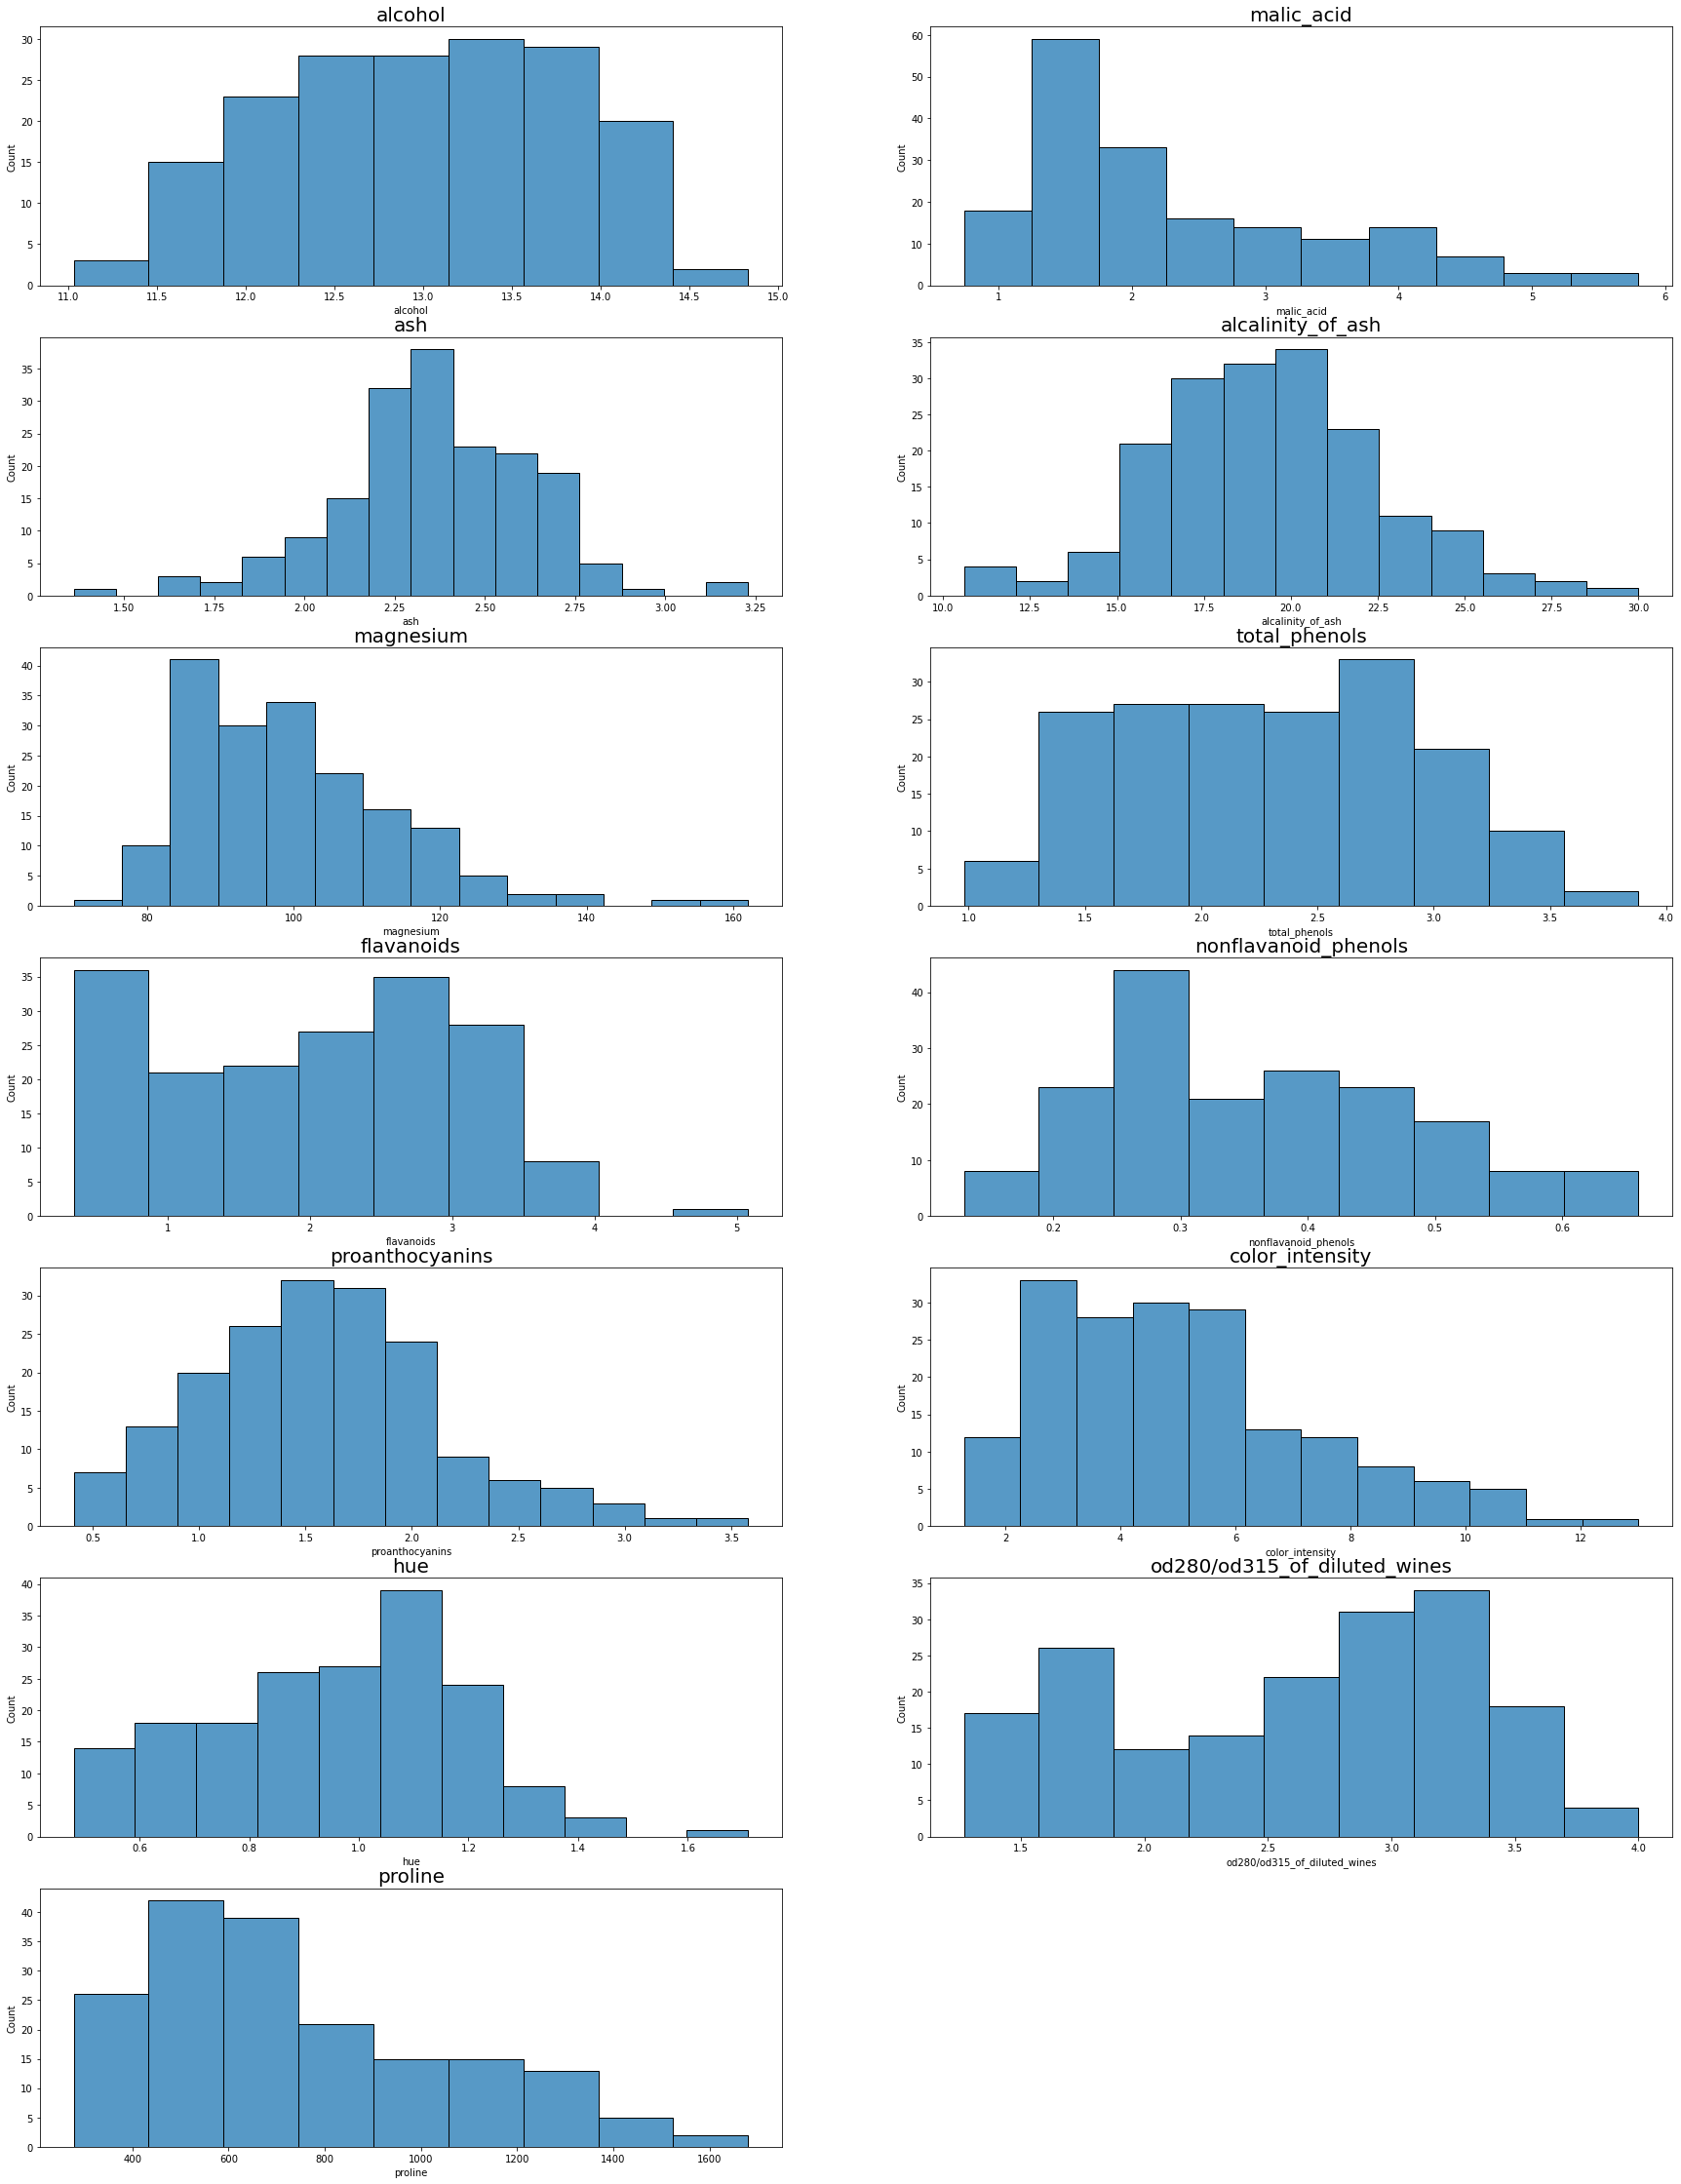

In [31]:
h=list(enumerate(df.columns[:-1]))
plt.figure(figsize=(30,40))
for x in h:
    plt.subplot(7,2,x[0]+1)
    sns.histplot(x=x[1],data=df)
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

In [32]:
df.shape

(178, 14)

TASK 2

In [33]:
from sklearn.model_selection import train_test_split
df_copy=df
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
print(df_train)
print(df_test)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   
..       ...         ...   ...                ...        ...            ...   
71     13.86        1.51  2.67               25.0       86.0           2.95   
106    12.25        1.73  2.12               19.0       80.0           1.65   
14     14.38        1.87  2.38               12.0      102.0           3.30   
92     12.69        1.53  2.26               20.7       80.0           1.38   
102    12.34        2.45  2.46               21.0       98.0           2.56   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
norm=MinMaxScaler().fit(df_copy.iloc[:,:-1]).transform(df_copy.iloc[:,:-1])
norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [35]:
standard=StandardScaler().fit(norm).transform(norm)
standard

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [222]:
new_df=pd.DataFrame(standard,columns=df.columns[:-1])
new_df_target=datasets.load_wine().target
X_train,X_test,Y_train,Y_test=train_test_split(new_df,new_df_target,test_size=0.2,random_state=31)

10,18,19,24,25,28,31,36,41,43,44,46,58

TASK 3

In [227]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score 
for x in range(1,20):
    clf = neighbors.KNeighborsClassifier(x)
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    y_predicted=pd.DataFrame(y_pred)
    print(x,round(clf.score(X_test,Y_test)*100,2))

1 88.89
2 86.11
3 91.67
4 88.89
5 91.67
6 83.33
7 88.89
8 88.89
9 91.67
10 88.89
11 88.89
12 86.11
13 86.11
14 88.89
15 91.67
16 88.89
17 91.67
18 88.89
19 91.67


In [233]:
clf = neighbors.KNeighborsClassifier(4)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
y_predicted=pd.DataFrame(y_pred)
ind=np.where(y_pred!=Y_test)
print(ind)

(array([10, 12, 25, 31], dtype=int64),)


TASK 4

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_df,new_df_target,test_size=0.2,random_state=42)

In [57]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711
137,-0.581338,2.848870,0.999674,1.653086,-0.262708,-0.809357,-1.434939,2.160669,-0.860096,-0.025128,-0.603037,-1.301828,-0.738463
98,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,0.362177,0.223610,-0.276711
159,0.592164,-0.598156,0.999674,0.902373,-0.754202,0.488531,-0.932956,1.274310,1.224884,2.894719,-1.699872,-1.174708,-0.404091
38,0.085705,-0.750759,-0.974210,-1.199622,-0.122282,0.168065,0.613153,-0.659563,-0.387033,-0.587469,0.976405,0.110615,0.869707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,0.834026,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
106,-0.927212,-0.544297,-0.901103,-0.148624,-1.386122,-1.033684,0.000733,0.065639,0.068508,-0.717240,0.186684,0.788587,-0.754385
14,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,1.617120,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935
92,-0.383696,-0.723829,-0.389355,0.361860,-1.386122,-1.466313,-0.571528,1.757779,0.050988,-0.868639,0.011190,-0.779224,-0.802153


In [58]:
Y_train

array([2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [241]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [242]:
gnb.predict(X_test)

array([1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2])

In [243]:
Y_test

array([1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2])

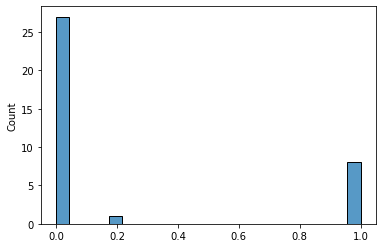

In [251]:
sns.histplot(gnb.predict_proba(X_test)[:,0])
plt.show()